In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
"""
normal=pd.read_csv('data/ptbdb_normal.csv',header=None)
abnormal=pd.read_csv('data/ptbdb_abnormal.csv',header=None)
combined_df=pd.concat([normal,abnormal])
shuffled_df =combined_df.sample(frac=1)
shuffled_df.to_csv('data/ptbdb_shuffled.csv',index=False,header=False)
shuffled_df
"""

"\nnormal=pd.read_csv('data/ptbdb_normal.csv',header=None)\nabnormal=pd.read_csv('data/ptbdb_abnormal.csv',header=None)\ncombined_df=pd.concat([normal,abnormal])\nshuffled_df =combined_df.sample(frac=1)\nshuffled_df.to_csv('data/ptbdb_shuffled.csv',index=False,header=False)\nshuffled_df\n"

In [3]:
traindata = pd.read_csv('data/mitbih_train.csv',header=None)
testdata = pd.read_csv('data/mitbih_test.csv',header=None)

In [4]:
traindata = traindata[traindata.iloc[:, -1] != 0.0]
testdata = testdata[testdata.iloc[:, -1] != 0.0]

In [5]:
traindata

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1.0
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1.0
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.0


In [6]:
testdata

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
18118,1.000000,0.758982,0.473054,0.193114,0.142216,0.176647,0.161677,0.142216,0.121257,0.107784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18119,1.000000,0.746556,0.088154,0.035813,0.212121,0.253444,0.269972,0.283747,0.275482,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18120,0.972840,0.728395,0.000000,0.037037,0.162963,0.143210,0.123457,0.140741,0.133333,0.096296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18121,1.000000,0.694444,0.238095,0.321429,0.337302,0.337302,0.301587,0.325397,0.325397,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18122,0.939815,0.791667,0.199074,0.000000,0.055556,0.101852,0.106481,0.143519,0.222222,0.189815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [7]:
y_test=testdata[len(testdata.columns)-1] #Taking the last column as y
testdataNoY=testdata.drop(testdata.columns[[len(testdata.columns)-1]], axis=1) #Remove the last column(removing y)
x_test = testdataNoY 

In [8]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
18118,1.000000,0.758982,0.473054,0.193114,0.142216,0.176647,0.161677,0.142216,0.121257,0.107784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18119,1.000000,0.746556,0.088154,0.035813,0.212121,0.253444,0.269972,0.283747,0.275482,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18120,0.972840,0.728395,0.000000,0.037037,0.162963,0.143210,0.123457,0.140741,0.133333,0.096296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18121,1.000000,0.694444,0.238095,0.321429,0.337302,0.337302,0.301587,0.325397,0.325397,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18122,0.939815,0.791667,0.199074,0.000000,0.055556,0.101852,0.106481,0.143519,0.222222,0.189815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_test

18118    1.0
18119    1.0
18120    1.0
18121    1.0
18122    1.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 3774, dtype: float64

In [10]:
y_train=traindata[len(traindata.columns)-1]#Taking the last column as y
trainDataNoY=traindata.drop(traindata.columns[[len(traindata.columns)-1]], axis=1) #Remove the last column(removing y)
x_train = trainDataNoY

In [11]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.483696,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.113122,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [12]:
y_train

72471    1.0
72472    1.0
72473    1.0
72474    1.0
72475    1.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 15083, dtype: float64

<h3>1. Data Preprocessing</h3>Data Cleaning: Check for missing or inconsistent data, and handle outliers if necessary.
Data Encoding: Convert categorical variables into numerical ones using techniques like one-hot encoding or label encoding, if needed.

<h3>2. Sample balancing</h3>Class Imbalance Handling: Before moving forward, check if your dataset has class imbalance (e.g., significantly more samples of one class). If so, consider techniques like:

Resampling: Either oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
Class Weights: Apply class weights in your model to handle imbalanced classes

<h4>2.1 Analyzing the balance of the data</h4>

In [13]:
class_frequencies=y_train.value_counts() #Count how many occurrences of each different classe there is in y 
print("Absolute Class Frequencies:\n", class_frequencies)

Absolute Class Frequencies:
 187
4.0    6431
2.0    5788
1.0    2223
3.0     641
Name: count, dtype: int64


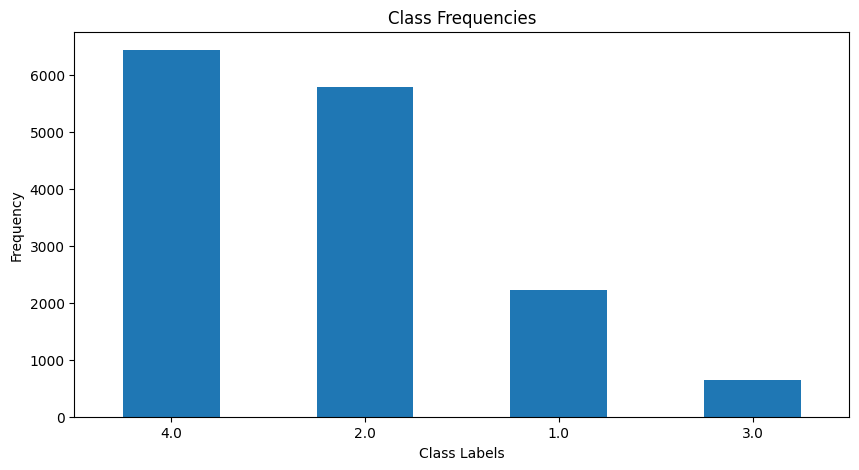

In [14]:
fig=plt.figure(figsize=(10,5))
class_frequencies.plot(kind='bar')
plt.title('Class Frequencies')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [15]:
class_proportions = y_train.value_counts(normalize=True)#Take the percentage of each different class in y
print("Class Proportions (Relative Frequencies):\n", class_proportions)

Class Proportions (Relative Frequencies):
 187
4.0    0.426374
2.0    0.383743
1.0    0.147384
3.0    0.042498
Name: proportion, dtype: float64


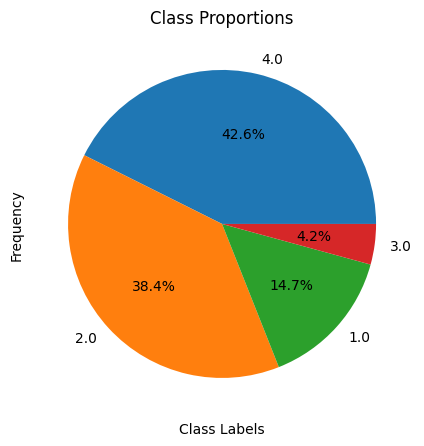

In [16]:
fig=plt.figure(figsize=(10,5))
class_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Proportions')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<strong>A common rule of thumb is that if the minority class represents less than 10–20% of the total samples, the data is often considered imbalanced.
In our case the data is highly unbalanced , so we must apply a balancing data strategy.</strong> 

<h4>2.2 Applying balancing data strategy to the data</h4>

In [17]:
"""
print("----- Weighted loss function -----")
x = data[:,1:]
y = data[:,0]

clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
"""

'\nprint("----- Weighted loss function -----")\nx = data[:,1:]\ny = data[:,0]\n\nclf = SVC(kernel = \'linear\', class_weight=\'balanced\')\nkf = StratifiedKFold(n_splits=5, shuffle = True)\n\ncv_y_test = []\ncv_y_pred = []\n\nfor train_index, test_index in kf.split(x, y):\n    \n    # Training phase\n    x_train = x[train_index, :]\n    y_train = y[train_index]\n    clf.fit(x_train, y_train)\n\n    # Test phase\n    x_test = x[test_index, :]\n    y_test = y[test_index]    \n    y_pred = clf.predict(x_test)\n\n    cv_y_test.append(y_test)\n    cv_y_pred.append(y_pred)\n\nprint(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))\n'

<h3>3. Feature Selection</h3>Feature Importance Analysis: Use techniques such as correlation, mutual information, or methods like Recursive Feature Elimination (RFE) to select the most relevant features.

<h3>5. Train-Validate-Test: </h3>
<ol>
    <li>Dataset Splitting:
        <ul>
            <li>Divide the dataset into three sets: training, validation, and test.</li>
            <li>Common splits are 70-15-15 or 80-10-10.</li>
        </ul>
    </li>
    <li>Model Training:
        <ul>
            <li>Train the model on the training set.</li>
        </ul>
    </li>
    <li>Validation:
        <ul>
            <li>Evaluate the model’s performance on the validation set.</li>
            <li>Tweak hyperparameters based on validation results.</li>
        </ul>
    </li>
    <li>Final Evaluation:
        <ul>
            <li>Assess the model’s performance on the test set for a final unbiased evaluation.</li>
        </ul>
    </li>
</ol>

In [18]:
class ModelResults:
        def __init__(self,modelName=None, accuracy=None, recall=None, precision=None,selectedFeatures=None,featureRanking=None,report=None):
            self.modelName = modelName
            self.accuracy = accuracy
            self.recall = recall
            self.precision = precision
            self.selectedFeatures = selectedFeatures
            self.featureRanking = featureRanking
            self.report = report
        def __toString__(self):
            return f"ModelResults(model name={self.modelName}, accuracy={self.accuracy}, recall={self.recall}, precision={self.precision}, Selected Features={self.selectedFeatures},Feature Ranking={self.featureRanking}\n{self.report})"

In [19]:
def trainAndTestModel(modelName, model):
    print("#######################################")
    print(modelName)
    print("#######################################")
    print("\n")
    
    model_accuracy = 0
    model_recall = np.array([0., 0., 0., 0., 0.])
    model_precision = np.array([0., 0., 0., 0., 0.])
    selected_features,feature_ranking,report=0,0,0
    
    try:
        # Crear RFE y Pipeline
        rfe = RFE(model, n_features_to_select=54)
        pipeline = Pipeline([
            ('feature_selection', rfe),
            ('classification', model)
        ])
        
        # Entrenar el modelo con el pipeline
        pipeline.fit(x_train, y_train)
        
        # Predecir con el modelo entrenado
        y_pred = pipeline.predict(x_test)
        
        # Mostrar las características seleccionadas por RFE
        selected_features = rfe.support_  # Boolean array de las features seleccionadas
        feature_ranking = rfe.ranking_    # Ranking de todas las features
        print("Características seleccionadas (True = seleccionada):", selected_features)
        print("Ranking de las características (1 = seleccionada):", feature_ranking)
        
        # Evaluar el rendimiento del modelo    
        report = classification_report(y_test, y_pred, zero_division=1)  # Aquí se añadió el parámetro zero_division
        print(report)  # Imprimir el classification report
        
        # Calcular los scores de rendimiento
        model_accuracy = accuracy_score(y_test, y_pred)
        model_recall = recall_score(y_test, y_pred, average=None, zero_division=1)
        model_precision = precision_score(y_test, y_pred, average=None, zero_division=1)
        
        print(f"{modelName}, Done Training and testModel")
        print("\n")
        
        return modelName, model_accuracy, model_recall, model_precision,selected_features,feature_ranking, report
    
    except Exception as e:
        print(f"An error occurred during the train-test: {e}")
        return modelName, model_accuracy, model_recall, model_precision,selected_features,feature_ranking, report

In [20]:
models = {
    "SVC": SVC(kernel='linear', C=1.0, class_weight='balanced'),  # Handles class imbalance
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced'),  # Handles class imbalance
    "LogisticRegression": LogisticRegression(C=1.0, solver='liblinear', class_weight='balanced'),  # Handles class imbalance
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=4, class_weight='balanced'),  # Handles class imbalance
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0), # Can be used with a base estimator that handles class imbalance
}

In [21]:
models_results=[]
for name,model in models.items():
    model_name,model_accuracy, model_recall, model_precision,selected_features,feature_ranking,report=trainAndTestModel(modelName=name,model=model)
    models_results.append(ModelResults(model_name,model_accuracy, model_recall, model_precision,selected_features,feature_ranking,report))

#######################################
SVC
#######################################


Características seleccionadas (True = seleccionada): [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True False False
 False  True False False  True  True False  True  True  True  True False
 False False False  True False  True False False  True False False False
 False False False False False  True False False  True False False False
  True False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False  True False False False  True False  True
 False False False False  True False False False False False  True False
 False False False False  True False False False False False  True False
 False False False False  True False False False False  Tr

In [22]:
for results in models_results:
    print(results.__toString__())

ModelResults(model name=SVC, accuracy=0.8905670376258612, recall=[0.85611511 0.86118785 0.90740741 0.92723881], precision=[0.83950617 0.90559187 0.46518987 0.98480845], Selected Features=[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True False False
 False  True False False  True  True False  True  True  True  True False
 False False False  True False  True False False  True False False False
 False False False False False  True False False  True False False False
  True False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False  True False False False  True False  True
 False False False False  True False False False False False  True False
 False False False False  True False False False False False  True False
 False Fal

<h3>6. Model Selection and Hyperparameter Tuning</h3>Initial Model Training: Select a few candidate models based on your problem type (e.g., Logistic Regression, SVM, Random Forest).
Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the best combination of hyperparameters for your model, ideally with cross-validation incorporated.

In [26]:
def trainAndTestModelWithHyperparameters(modelName, model, param_grid, x_train_selected, x_test_selected):
    print("#######################################")
    print(modelName)
    print("#######################################")
    print("\n")
    
    model_accuracy = 0
    model_recall = np.array([0., 0., 0., 0., 0.])
    model_precision = np.array([0., 0., 0., 0., 0.])
    report = 0
    
    try:
        # Configurar la búsqueda aleatoria de hiperparámetros
        random_search = RandomizedSearchCV(model, param_grid, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
        
        # Entrenar el modelo con los hiperparámetros optimizados
        random_search.fit(x_train_selected, y_train)
        
        # Obtener los mejores hiperparámetros
        best_params = random_search.best_params_
        print(f"Mejores hiperparámetros encontrados: {best_params}")
        
        # Predecir con el modelo entrenado con los mejores hiperparámetros
        y_pred = random_search.predict(x_test_selected)
        
        # Evaluar el rendimiento del modelo    
        report = classification_report(y_test, y_pred, zero_division=1)
        print(report)  # Imprimir el classification report
        
        # Calcular los scores de rendimiento
        model_accuracy = accuracy_score(y_test, y_pred)
        model_recall = recall_score(y_test, y_pred, average=None, zero_division=1)
        model_precision = precision_score(y_test, y_pred, average=None, zero_division=1)
        
        print(f"{modelName}, Done Training and Testing with Hyperparameters")
        print("\n")
        
        return modelName, model_accuracy, model_recall, model_precision, best_params, report
    
    except Exception as e:
        print(f"An error occurred during the train-test: {e}")
        return modelName, model_accuracy, model_recall, model_precision, {}, report


In [44]:
# Filtrar las características seleccionadas

selected_features = np.array([ True,  True,  True,  True,  True,  True, False,  True,  True, False,  True,  True,
  True,  True,  True,  True, False,  True,  True,  True,  True, False, False, False,
  True,  True,  True, False,  True,  True, False, False,  True,  True,  True, False,
 False, False, False,  True,  True,  True,  True, False, False, False,  True, False,
 False, False, False, False, False,  True, False, False,  True, False, False, False,
  True, False, False, False,  True, False, False, False,  True, False, False, False,
 False, False,  True, False,  True, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False,  True, False, False, False,
  True, False, False, False, False, False, False,  True, False, False, False,  True,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False,  True, False, False, False, False, False,  True, False,
 False,  True, False, False,  True, False, False, False, False,  True, False, False,
 False, False,  True,  True, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False,  True, False, False, False, False, False,
 False, False, False, False, False, False,  True,  True, False, False,  True,
 False, False,  True, False, False, False, False,False])

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Length of selected_features: {len(selected_features)}")


Shape of x_train: (15083, 187)
Shape of x_test: (3774, 187)
Length of selected_features: 187


In [45]:
x_train_selected = x_train.iloc[:, selected_features]
x_test_selected = x_test.iloc[:, selected_features]

In [47]:
# Hiperparámetros a probar en el modelo RandomForestClassifier
param_grid = {
   'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
selected_model=RandomForestClassifier()

# Llamada a la función con RandomForestClassifier
trainAndTestModelWithHyperparameters('RandomForest', selected_model, param_grid, x_train_selected, x_test_selected)

#######################################
RandomForest
#######################################


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

<h3>7. Model Evaluation</h3>
Evaluate on Test Data: After tuning, use the test set to evaluate your model using performance metrics like accuracy, precision, recall, F1-score, and confusion matrix.
ROC Curve and AUC for binary classification tasks.

In [23]:
def trainFinalModelWithRFE(modelName, model, x_total, y_total):
    print("#######################################")
    print(f"Training Final Model: {modelName}")
    print("#######################################")
    print("\n")

    try:
        # Crear RFE con el modelo seleccionado
        rfe = RFE(model, n_features_to_select=10)  # Selecciona el número de características importantes
        
        # Crear el pipeline
        pipeline = Pipeline([
            ('feature_selection', rfe),    # Selección de características con RFE
            ('classification', model)      # Modelo seleccionado
        ])
        
        # Entrenar el pipeline con todo el dataset disponible
        pipeline.fit(x_total, y_total)
        
        # Obtener las características seleccionadas por RFE
        selected_features = rfe.support_
        feature_ranking = rfe.ranking_
        print("Características seleccionadas (True = seleccionada):", selected_features)
        print("Ranking de las características (1 = seleccionada):", feature_ranking)
        
        print(f"{modelName}, Done Training with all available data")
        
        # Devolver el pipeline entrenado con RFE aplicado
        return pipeline
    
    except Exception as e:
        print(f"An error occurred during final training: {e}")
        return None

In [24]:
# Entrenar el modelo final con los datos completos
#final_model = RandomForestClassifier()
#final_model.fit(x_total, y_total)  # Ajustar con todos los datos

# Guardar el modelo en un archivo usando pickle
#with open('final_model.pkl', 'wb') as model_file:
#    pickle.dump(final_model, model_file)

#print("Modelo guardado exitosamente.")